In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier  # feedforward neural network trained using backpropagation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load Dataset (Replace 'flowers.csv' with your actual dataset file)
data = pd.read_csv("iriss.csv")  # Ensure the dataset contains X (features) and y (labels)

In [3]:
# Display first few rows
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Step 3: Split Data into Features (X) and Target (y)
X = data.iloc[:, :-1].values  # Selecting all columns except the last one (features)
y = data.iloc[:, -1].values   # Selecting the last column (target/labels)

In [5]:
# Step 4: Convert String Labels to Numbers using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to numerical values

In [6]:
# Step 5: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [7]:
# Step 6: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Step 7: Build Neural Network Model using MLPClassifier (Multi-layer Perceptron)
model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', max_iter=50, solver='adam', random_state=42)

In [9]:
# Step 8: Train the Model
model.fit(X_train_scaled, y_train)

c:\Users\Ravi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=50, random_state=42)

In [10]:
# Step 9: Make Predictions
y_pred = model.predict(X_test_scaled)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0]


In [11]:
# Step 10: Evaluate Model
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.5000


In [12]:
# Step 11: Convert Predictions back to Original Labels
predicted_labels = label_encoder.inverse_transform(y_pred)

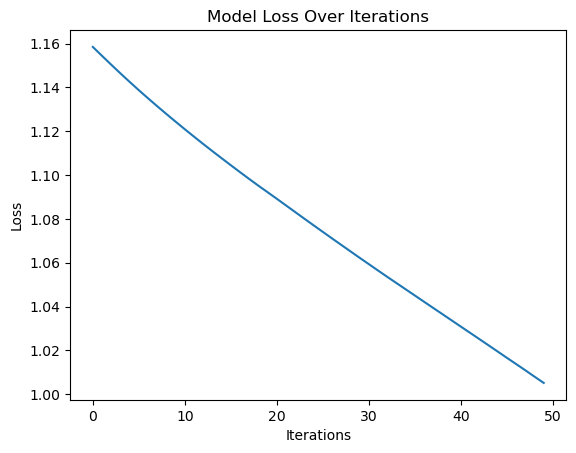

In [13]:
# Step 12: Visualizing Accuracy (Plotting Training Loss)
plt.plot(model.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Model Loss Over Iterations")
plt.show()